In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
#loading data
df = pd.read_csv('covidupdated.csv', low_memory=False)
df['DATEDIED'] = pd.to_datetime(df['DATEDIED'], format='%d/%m/%Y').astype('int64')
print(df.describe())

              Depth         USMER   MEDICALUNIT           SEX   PATIENTTYPE  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242870e+05  1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00   
std    3.026977e+05  4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.621435e+05  1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00   
50%    5.242870e+05  2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00   
75%    7.864305e+05  2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00   
max    1.048574e+06  2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00   

           DATEDIED       INTUBED     PNEUMONIA           AGE      PREGNANT  \
count  1.048575e+06  1.041250e+06  1.032572e+06  1.048365e+06  1.044821e+06   
mean  -8.429786e+18  1.967677e+00  1.864379e+00  4.178276e+01  1.992218e+00   
std    2.820095e+18  1.768558e-01  3.423854e-01  1.

In [8]:
# Perform Z normalization
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Save the normalized DataFrame to a new CSV file
df_normalized.to_csv('covid_normalized.csv')
data_normalized = pd.read_csv('covid_normalized.csv')
data_normalized = data_normalized.fillna(data_normalized.mean())
data = data_normalized.values
print(data)

[[ 0.00000000e+00 -1.73204916e+00  7.62753243e-01 ... -1.22565191e+00
   1.28293452e-01  3.55360697e+00]
 [ 1.00000000e+00 -1.73204585e+00  7.62753243e-01 ... -1.62480689e-01
   1.28293452e-01  3.55360697e+00]
 [ 2.00000000e+00 -1.73204255e+00  7.62753243e-01 ... -1.22565191e+00
   1.28293452e-01  3.55360697e+00]
 ...
 [ 1.04857200e+06  1.73204255e+00  7.62753243e-01 ...  9.00690535e-01
   1.28293452e-01 -2.81404221e-01]
 [ 1.04857300e+06  1.73204585e+00  7.62753243e-01 ...  9.00690535e-01
   1.28293452e-01 -2.81404221e-01]
 [ 1.04857400e+06  1.73204916e+00  7.62753243e-01 ...  9.00690535e-01
   1.28293452e-01 -2.81404221e-01]]


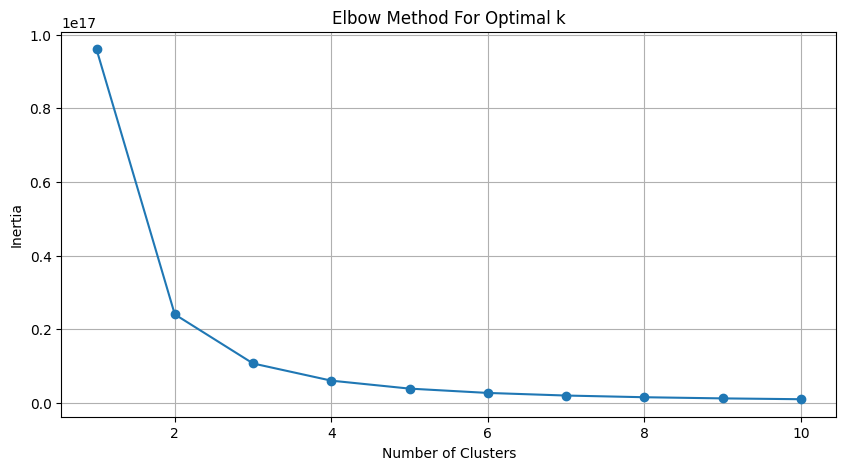

In [14]:
# To find the optimal number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method For Optimal k')
    ax.grid(True)
    plt.show()

optimise_k_means(data, 10)

In [30]:
# Add the cluster labels to the DataFrame as there is not much difference after 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data_df = pd.DataFrame(data)
data_df['kmeans_4'] = labels
data_df.columns = data_df.columns.astype(str)


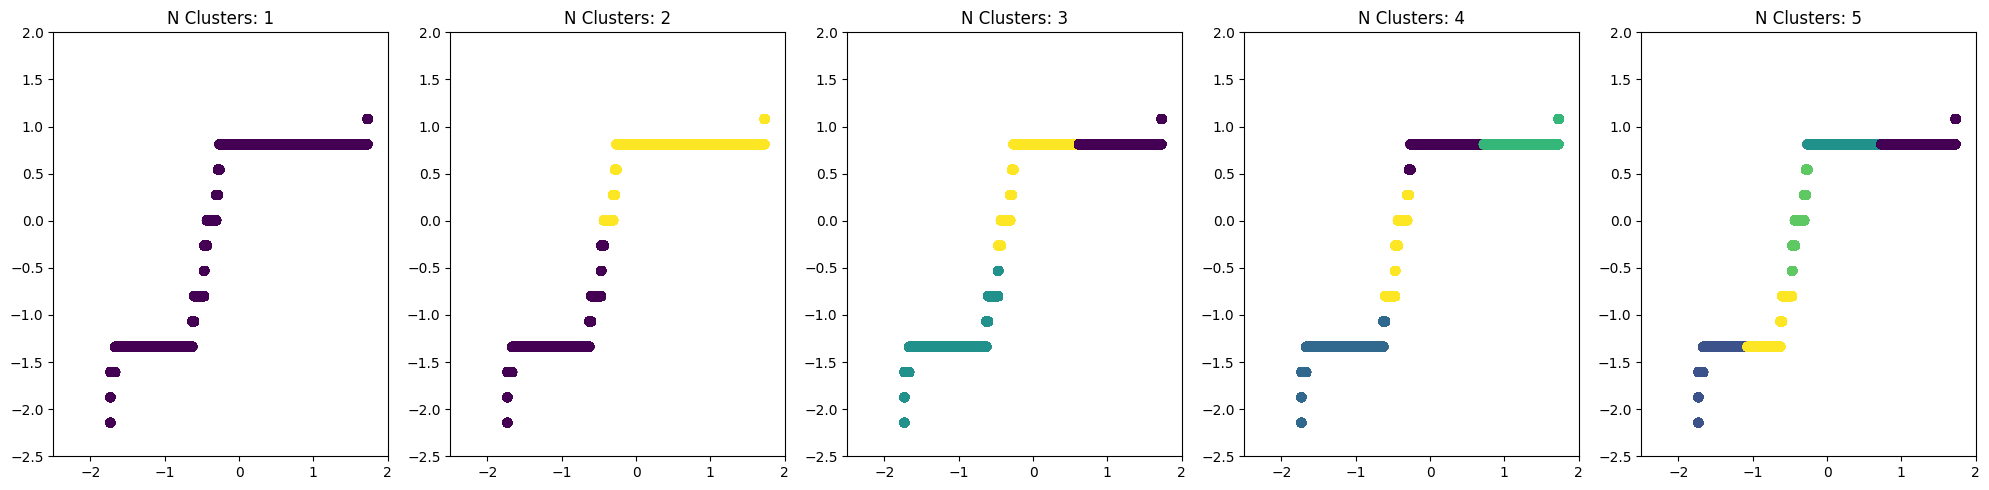

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
col1 = data_df.columns[1]
col2 = data_df.columns[3]
for i, ax in enumerate(fig.axes, start=1):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=i, n_init=10)
    data_df['KMeans_' + str(i)] = kmeans.fit_predict(data_df[[col1, col2]])
    
    # Create scatter plot on ax
    ax.scatter(x=data_df[col1], y=data_df[col2], c=data_df['KMeans_' + str(i)], cmap='viridis')
    
    # Set the limits of x and y axes
    ax.set_xlim(-2.5, 2)
    ax.set_ylim(-2.5, 2)  # Assuming you want to invert the y-axis as in your snippet
    
    # Set the title for each subplot
    ax.set_title(f'N Clusters: {i}')

# Show the plots
plt.tight_layout()
plt.show()